Criando DataFrame

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Definindo número de registros
np.random.seed(42)
n_reservas = 400

# Gerando dados simulados
def gerar_dados_hotelaria(n):
    genero = np.random.choice(['Masculino', 'Feminino'], n)
    faixa_etaria = np.random.choice(['18-25', '26-35', '36-50', '51+'], n)
    preco_diaria = np.random.normal(250, 50, n).round(2)
    estadia_dias = np.random.randint(1, 15, n) + 0.02 * preco_diaria
    total_pago = (estadia_dias * preco_diaria).round(2)
    data_checkin = [datetime(2024, 1, 1) + timedelta(days=int(x)) for x in np.random.randint(0, 180, n)]
    avaliacao = np.random.choice([1, 2, 3, 4, 5], n, p=[0.1, 0.15, 0.25, 0.3, 0.2])
    tipo_quarto = np.random.choice(['Padrão', 'Luxo', 'Suíte'], n, p=[0.5, 0.3, 0.2])

    return pd.DataFrame({
        'Genero': genero,
        'Faixa_Etaria': faixa_etaria,
        'Estadia_Dias': estadia_dias,
        'Preco_Diaria': preco_diaria,
        'Total_Pago': total_pago,
        'Data_Checkin': data_checkin,
        'Avaliacao': avaliacao,
        'Tipo_Quarto': tipo_quarto
    })

df = gerar_dados_hotelaria(n_reservas)

# Visualizando amostra dos dados
print(df.head())


      Genero Faixa_Etaria  Estadia_Dias  Preco_Diaria  Total_Pago  \
0  Masculino          51+       16.3054        315.27     5140.60   
1   Feminino          51+       19.0210        251.05     4775.22   
2  Masculino        36-50       13.6820        284.10     3887.06   
3  Masculino        18-25       15.6898        234.49     3679.10   
4  Masculino          51+       19.3242        266.21     5144.30   

  Data_Checkin  Avaliacao Tipo_Quarto  
0   2024-03-07          3        Luxo  
1   2024-02-25          5      Padrão  
2   2024-02-09          3      Padrão  
3   2024-04-07          4      Padrão  
4   2024-02-09          1        Luxo  


Medidas de dispersão

In [ ]:
print("\nMedidas de Dispersão:\n")

variaveis_numericas = ['Estadia_Dias', 'Preco_Diaria', 'Total_Pago', 'Avaliacao']
for col in variaveis_numericas:
    print(f"--- {col} ---")
    print(f"Desvio Padrão: {df[col].std():.2f}")
    print(f"Variância: {df[col].var():.2f}")
    print(f"Amplitude: {df[col].max() - df[col].min():.2f}")
    print(f"Q1: {df[col].quantile(0.25)} | Q3: {df[col].quantile(0.75)} | IQR: {df[col].quantile(0.75) - df[col].quantile(0.25)}")
    print()


Medidas de Dispersão:

--- Estadia_Dias ---
Desvio Padrão: 4.21
Variância: 17.73
Amplitude: 17.04
Q1: 9.03905 | Q3: 15.997150000000001 | IQR: 6.958100000000002

--- Preco_Diaria ---
Desvio Padrão: 50.15
Variância: 2515.07
Amplitude: 288.78
Q1: 212.48000000000002 | Q3: 281.475 | IQR: 68.995

--- Total_Pago ---
Desvio Padrão: 1400.53
Variância: 1961472.95
Amplitude: 7266.52
Q1: 2098.5475 | Q3: 4134.995 | IQR: 2036.4474999999998

--- Avaliacao ---
Desvio Padrão: 1.26
Variância: 1.58
Amplitude: 4.00
Q1: 2.0 | Q3: 4.0 | IQR: 2.0



Escalas de medição

In [ ]:
print("\nEscala de Medição das Variáveis:\n")
escalas = {
    'Genero': 'Nominal',
    'Faixa_Etaria': 'Ordinal',
    'Estadia_Dias': 'Razão',
    'Preco_Diaria': 'Razão',
    'Total_Pago': 'Razão',
    'Data_Checkin': 'Intervalar',
    'Avaliacao': 'Ordinal',
    'Tipo_Quarto': 'Nominal'
}

for var, escala in escalas.items():
    print(f"{var}: {escala}")


Escala de Medição das Variáveis:

Genero: Nominal
Faixa_Etaria: Ordinal
Estadia_Dias: Razão
Preco_Diaria: Razão
Total_Pago: Razão
Data_Checkin: Intervalar
Avaliacao: Ordinal
Tipo_Quarto: Nominal


Séries temporais


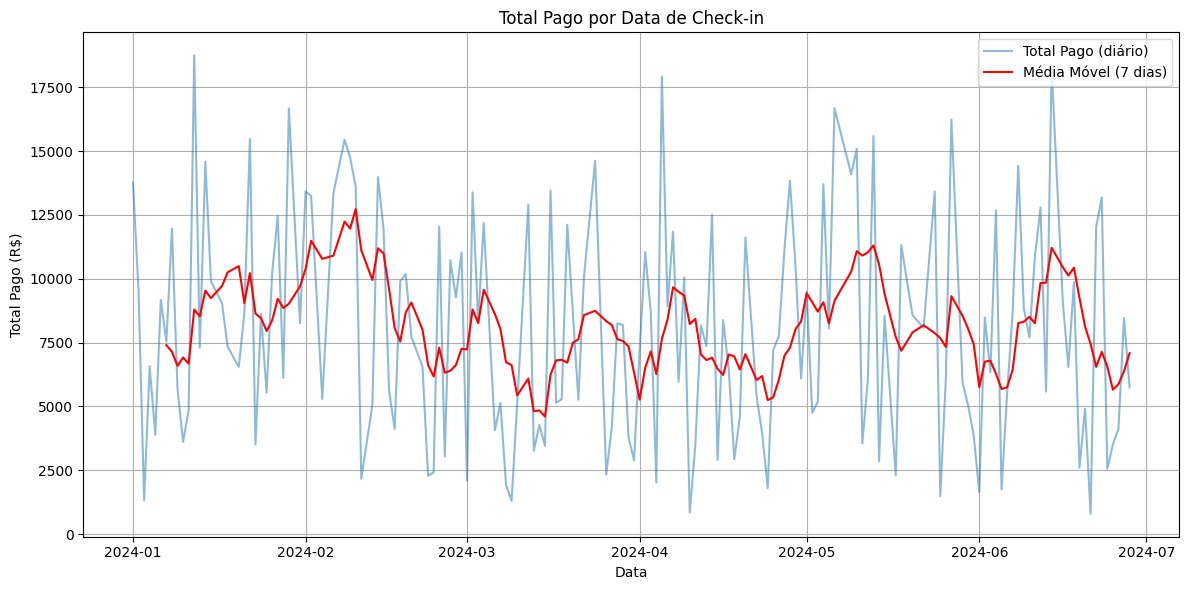

In [ ]:
import matplotlib.pyplot as plt
# Converter para datetime
df['Data_Checkin'] = pd.to_datetime(df['Data_Checkin'])
# Agrupar por data e somar o total pago
serie_diaria = df.groupby('Data_Checkin')['Total_Pago'].sum()
# Ordenar por data
serie_diaria = serie_diaria.sort_index()
# Média móvel de 7 dias
media_movel = serie_diaria.rolling(window=7).mean()
# Plotar
plt.figure(figsize=(12, 6))
plt.plot(serie_diaria, label='Total Pago (diário)', alpha=0.5)
plt.plot(media_movel, label='Média Móvel (7 dias)', color='red')
plt.title('Total Pago por Data de Check-in')
plt.xlabel('Data')
plt.ylabel('Total Pago (R$)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Regressão linear simples

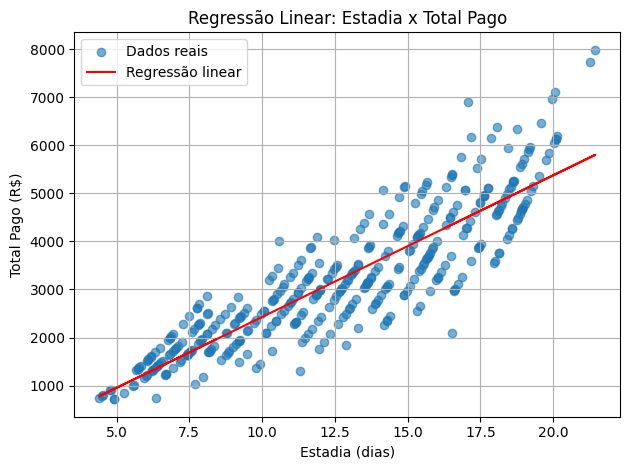

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
# 1. Selecionar as variáveis
X = df['Estadia_Dias']  # Variável independente
y = df['Total_Pago']    # Variável dependente
# 2. Adicionar uma constante (intercepto)
X = sm.add_constant(X)
# 3. Ajustar o modelo
modelo = sm.OLS(y, X).fit()
# Recriar X sem constante para o gráfico
x_vals = df['Estadia_Dias']
y_vals = df['Total_Pago']
# Predições do modelo
y_pred = modelo.predict(sm.add_constant(x_vals))
# Plotar pontos reais
plt.scatter(x_vals, y_vals, label='Dados reais', alpha=0.6)
# Plotar linha da regressão
plt.plot(x_vals, y_pred, color='red', label='Regressão linear')
plt.title('Regressão Linear: Estadia x Total Pago')
plt.xlabel('Estadia (dias)')
plt.ylabel('Total Pago (R$)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Medidas de tendência central


Média: 2.51
Mediana: 2.00
Moda: 4.00
1º Quartil (Q1): 1.00
3º Quartil (Q3): 4.00
Percentil 90 (P90): 4.00


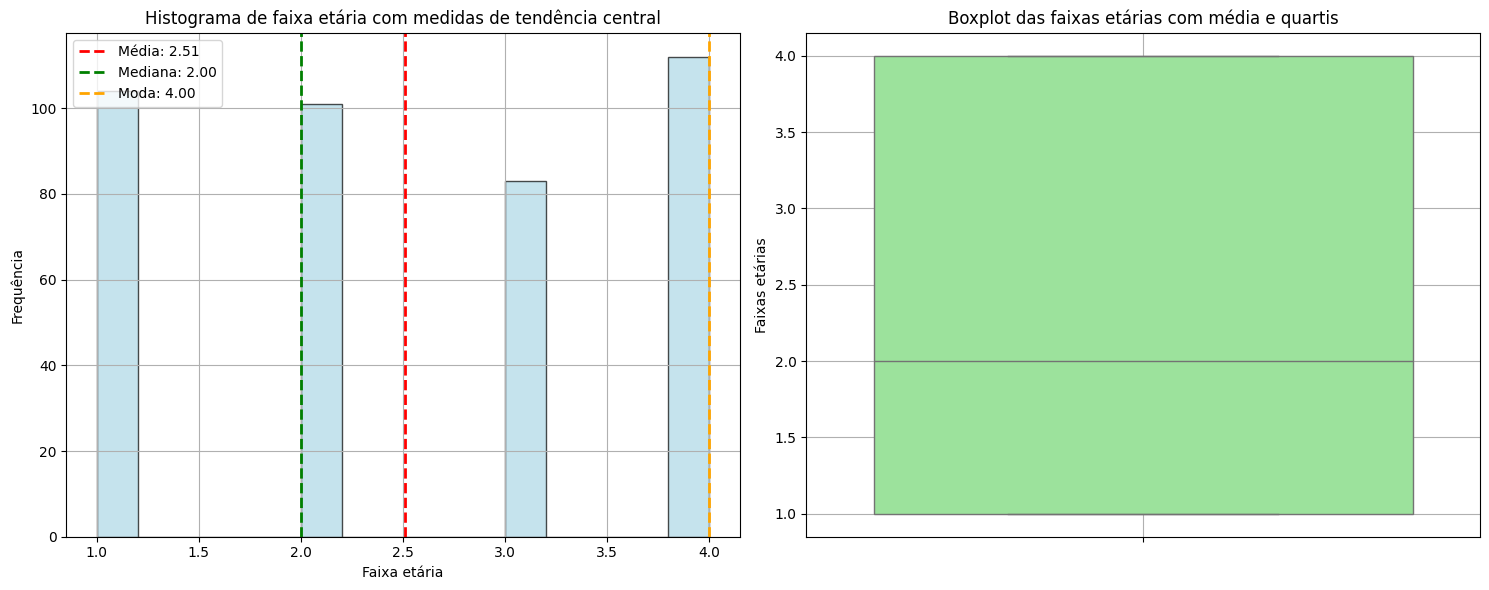

,Média,Mediana,Moda,1º Quartil (Q1),3º Quartil (Q3),Percentil 90 (P90)
0,2.5075,2.0,4,1.0,4.0,4.0


In [ ]:

# Importando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Transformando as categorias em um array
faixa_etaria = df['Faixa_Etaria'].map({
    '18-25': 1,
    '26-35': 2,
    '36-50': 3,
    '51+': 4
})


# Calculando as medidas de tendência central
mean = np.mean(faixa_etaria)
median = np.median(faixa_etaria)
mode = stats.mode(faixa_etaria)[0]
q1 = np.percentile(faixa_etaria, 25)
q3 = np.percentile(faixa_etaria, 75)
p90 = np.percentile(faixa_etaria, 90)

# Exibindo as medidas calculadas
print(f"Média: {mean:.2f}")
print(f"Mediana: {median:.2f}")
print(f"Moda: {mode:.2f}")
print(f"1º Quartil (Q1): {q1:.2f}")
print(f"3º Quartil (Q3): {q3:.2f}")
print(f"Percentil 90 (P90): {p90:.2f}")

# Criando um layout de gráficos 1x2
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Histograma com as linhas da Média e Mediana
axes[0].hist(faixa_etaria, bins=15, color='lightblue', edgecolor='black', alpha=0.7)
axes[0].axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Média: {mean:.2f}')
axes[0].axvline(median, color='green', linestyle='dashed', linewidth=2, label=f'Mediana: {median:.2f}')
axes[0].axvline(mode, color='orange', linestyle='dashed', linewidth=2, label=f'Moda: {mode:.2f}')
axes[0].legend()
axes[0].set_title('Histograma de faixa etária com medidas de tendência central')
axes[0].set_xlabel('Faixa etária')
axes[0].set_ylabel('Frequência')
axes[0].grid(True)

# Boxplot para visualizar os Quartis e a Mediana
sns.boxplot(data=faixa_etaria, color='lightgreen', ax=axes[1])
axes[1].set_title('Boxplot das faixas etárias com média e quartis')
axes[1].set_ylabel('Faixas etárias')
axes[1].grid(True)

# Exibindo os gráficos e as informações
plt.tight_layout()
plt.show()

summary = pd.DataFrame({
    'Média': [mean],
    'Mediana': [median],
    'Moda': [mode],
    '1º Quartil (Q1)': [q1],
    '3º Quartil (Q3)': [q3],
    'Percentil 90 (P90)': [p90]
})

summary



Correlação entre variáveis

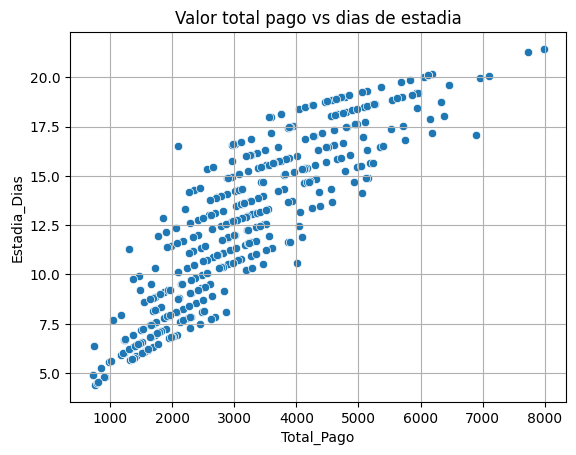

Coeficiente de correlação de Pearson: r = 0.89
Valor-p: 0.0000


In [ ]:
# Importando as bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Visualizar dados
sns.scatterplot(data=df, x='Total_Pago', y='Estadia_Dias')
plt.title('Valor total pago vs dias de estadia')
plt.grid(True)
plt.show()

# Calcular correlação de Pearson
r, p_value = pearsonr(df['Total_Pago'], df['Estadia_Dias'])

print(f'Coeficiente de correlação de Pearson: r = {r:.2f}')
print(f'Valor-p: {p_value:.4f}')